In [39]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
df_num = pd.read_csv('./df_num.csv')

In [34]:
df_num.columns

Index(['Unnamed: 0', 'BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'In_Out', 'DOB', 'DOD',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_

In [77]:
df=df_num[['DOB', 'DOD','ClaimStartDt', 'ClaimEndDt','PotentialFraud','In_Out']]

In [133]:
df['Claim_Period']=(pd.to_datetime(df.ClaimEndDt)-pd.to_datetime(df.ClaimStartDt)).dt.days+1

In [134]:
df['Patient_Age']=(pd.to_datetime(df.ClaimStartDt)-pd.to_datetime(df.DOB)).dt.days//365

In [136]:
df

,DOB,DOD,ClaimStartDt,ClaimEndDt,PotentialFraud,In_Out,Claim_Period,Patient_Age,AgeGroup
0,1943-01-01,NaN,2009-04-12,2009-04-18,Yes,1,7,66,60
1,1943-01-01,NaN,2009-08-31,2009-09-02,No,1,3,66,60
2,1943-01-01,NaN,2009-09-17,2009-09-20,No,1,4,66,60
3,1914-03-01,NaN,2009-02-14,2009-02-22,No,1,9,95,90
4,1938-04-01,NaN,2009-08-13,2009-08-30,No,1,18,71,70
...,...,...,...,...,...,...,...,...,...
558206,1952-04-01,NaN,2009-08-06,2009-08-06,No,0,1,57,50
558207,1952-04-01,NaN,2009-08-29,2009-08-29,No,0,1,57,50
558208,1952-04-01,NaN,2009-09-24,2009-09-24,No,0,1,57,50
558209,1952-04-01,NaN,2009-10-18,2009-10-18,No,0,1,57,50


<AxesSubplot:xlabel='Patient_Age', ylabel='Claim_Period'>

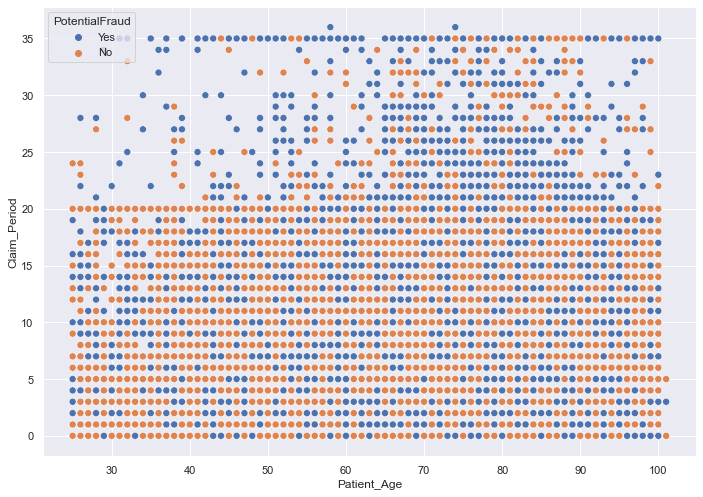

In [50]:


sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df,x="Patient_Age", y="Claim_Period",
                hue='PotentialFraud',s=50)

<AxesSubplot:xlabel='Patient_Age', ylabel='Claim_Period'>

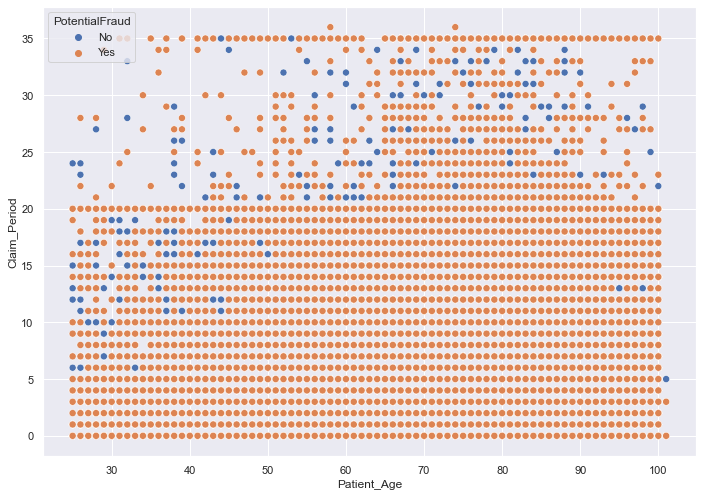

In [54]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df_sort,x="Patient_Age", y="Claim_Period",
                hue='PotentialFraud',s=50)

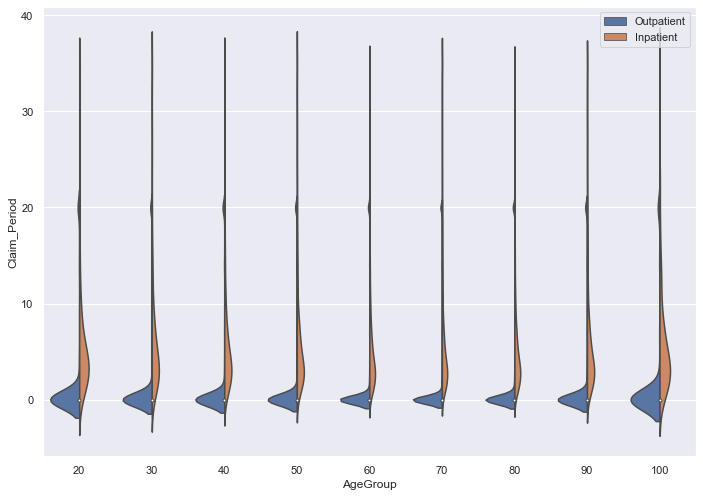

In [130]:
ax= sns.violinplot(x="AgeGroup", y="Claim_Period", hue="In_Out", 
                   split=True, data=df);
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Outpatient', 'Inpatient'], 
          bbox_to_anchor=(1,1))
          #title='whatever title you want to use'